# Preprocess Team

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.24.4', '1.5.3', '0.12.2', '3.7.2')

## 1. Load data

In [4]:
df = pd.read_csv('/Users/richakakati/Documents/ML/ML Project/Preprocessing/cirrhosis.csv')

In [5]:
# print the first rows of data
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [6]:
# Check the shape of your data
df.shape

(418, 20)

In [7]:
# Statistical info Hint: look up .describe()
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [8]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [9]:
# Check the column names
a = df.columns
print(a)
len(a)

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')


20

In [10]:
# Assuming 'Age' is the column containing age in days in your DataFrame

# Conversion factor: Number of days in a year (365.25 to account for leap years)
days_in_a_year = 365.25

# Convert age in days to years
df['Age'] = df['Age'] / days_in_a_year

# Drop the original 'Age' column if you no longer need it
# df = df.drop(columns=['Age'])

# Print the DataFrame to check the changes
print(df.head())

   ID  N_Days Status             Drug        Age Sex Ascites Hepatomegaly  \
0   1     400      D  D-penicillamine  58.765229   F       Y            Y   
1   2    4500      C  D-penicillamine  56.446270   F       N            Y   
2   3    1012      D  D-penicillamine  70.072553   M       N            N   
3   4    1925      D  D-penicillamine  54.740589   F       N            Y   
4   5    1504     CL          Placebo  38.105407   F       N            Y   

  Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0       Y     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1       Y     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2       N     S        1.4        176.0     3.48   210.0     516.0   96.10   
3       Y     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4       Y     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0  

## 2. Exploratory Data Analysis



### 2.1 Univariate analyis

Single variable exploratory data anlaysis

#### Countplot

<Axes: xlabel='Ascites', ylabel='count'>

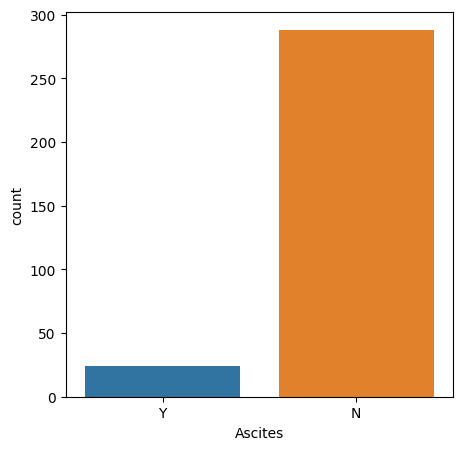

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'Ascites')

<Axes: xlabel='Edema', ylabel='count'>

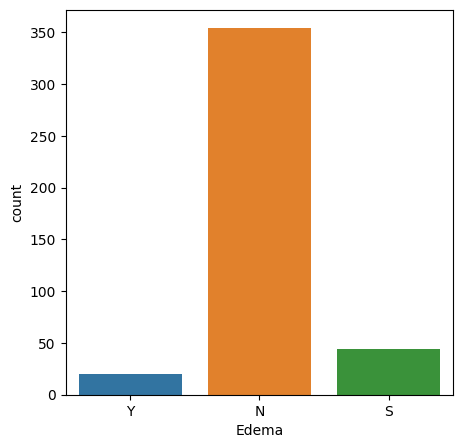

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'Edema')

In [13]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58.765229,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.446270,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.072553,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54.740589,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38.105407,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,67.000684,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,39.000684,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,56.999316,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,58.001369,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [14]:
# mapping = {
#     'M': 1,
#     'F': 2,
# }
# df['Sex'] = df['Sex'].map(mapping)
# df

In [15]:
# mapping = {
#     'Y': 1,
#     'N': 0,
# }
# df['Ascites'] = df['Ascites'].map(mapping)
# df

In [16]:
# mapping = {
#     'Y': 1,
#     'N': 0,
# }
# df['Hepatomegaly'] = df['Hepatomegaly'].map(mapping)
# df

In [17]:
# mapping = {
#     'Y': 1,
#     'N': 0,
# }
# df['Spiders'] = df['Spiders'].map(mapping)
# df

In [18]:
df.Edema.describe

<bound method NDFrame.describe of 0      Y
1      N
2      S
3      S
4      N
      ..
413    N
414    N
415    N
416    N
417    N
Name: Edema, Length: 418, dtype: object>

In [19]:
# mapping = {
#     'Y': 1,
#     'N': 0,
#     'S': 2,
# }
# df['Edema'] = df['Edema'].map(mapping)
# df

<Axes: xlabel='Hepatomegaly', ylabel='count'>

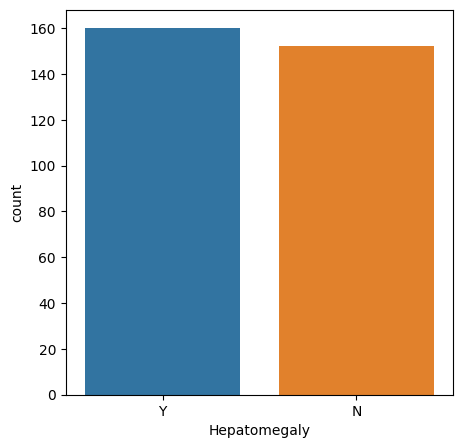

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'Hepatomegaly')

<Axes: xlabel='Spiders', ylabel='count'>

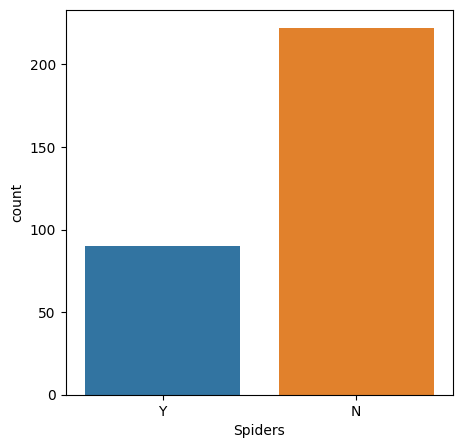

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'Spiders')

<Axes: xlabel='Sex', ylabel='count'>

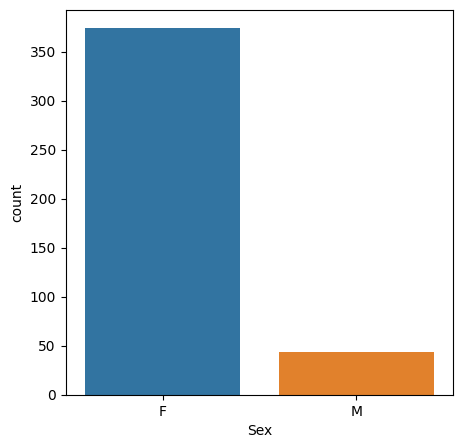

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'Sex')

<Axes: xlabel='Stage', ylabel='count'>

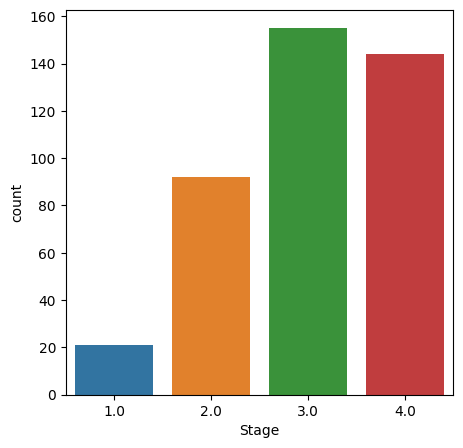

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'Stage')

In [24]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58.765229,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.446270,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.072553,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54.740589,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38.105407,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,67.000684,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,39.000684,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,56.999316,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,58.001369,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


### 2.2 Multivariate analysis

Multiple variable exploratory data analysis

In [25]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58.765229,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.446270,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.072553,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54.740589,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38.105407,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,67.000684,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,39.000684,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,56.999316,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,58.001369,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


#### Boxplot

Text(0.5, 0, 'Sex')

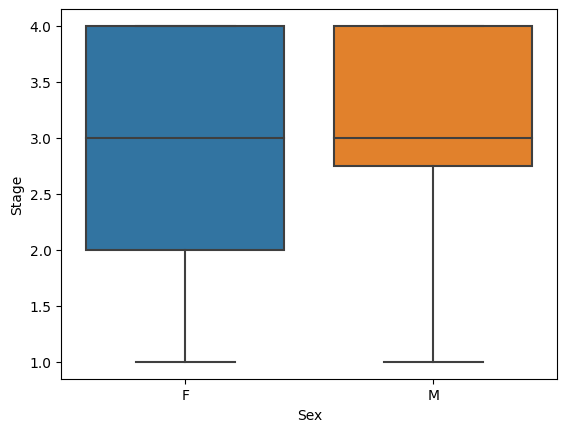

In [26]:
sns.boxplot(x = df["Sex"], y = (df["Stage"]));
plt.ylabel("Stage")
plt.xlabel("Sex")

Text(0.5, 0, 'Sex')

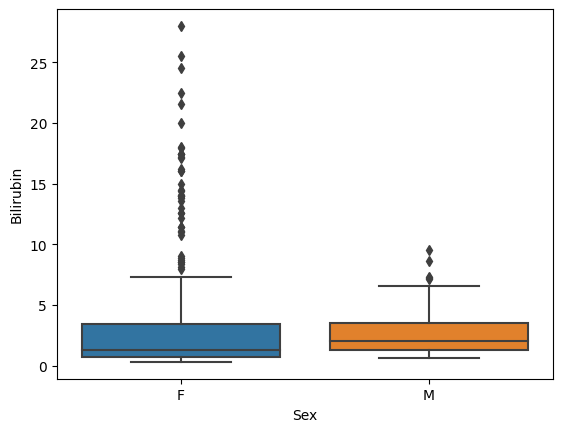

In [27]:
sns.boxplot(x = df["Sex"], y = (df["Bilirubin"]));
plt.ylabel("Bilirubin")
plt.xlabel("Sex")

We can see from the above graph that selling price of test drive cars are quite expensive. Therefore, we delete all samples related to it.

Text(0.5, 0, 'Sex')

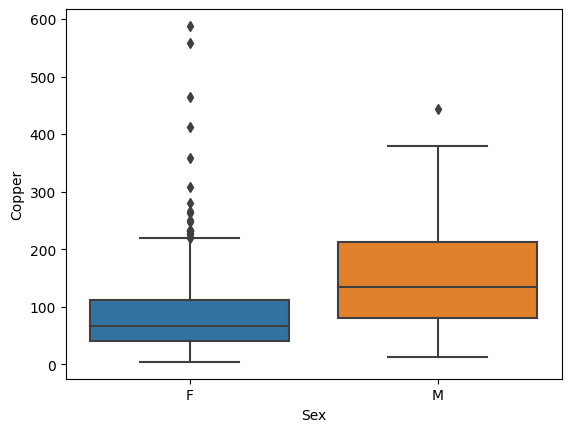

In [28]:
sns.boxplot(x = df["Sex"], y = (df["Copper"]));
plt.ylabel("Copper")
plt.xlabel("Sex")

Text(0.5, 0, 'Copper')

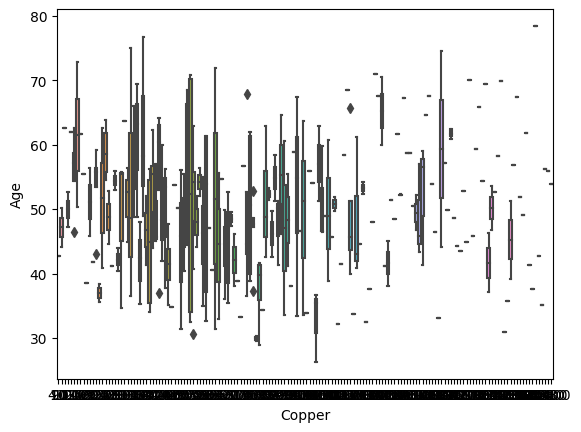

In [29]:
sns.boxplot(x = df["Copper"], y = (df["Age"]));
plt.ylabel("Age")
plt.xlabel("Copper")

Text(0.5, 0, 'Sex')

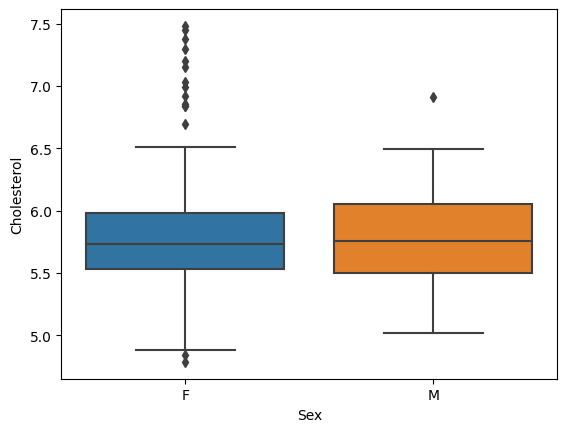

In [30]:
sns.boxplot(x = df["Sex"], y = np.log(df["Cholesterol"]));
plt.ylabel("Cholesterol")
plt.xlabel("Sex")

Text(0.5, 0, 'Sex')

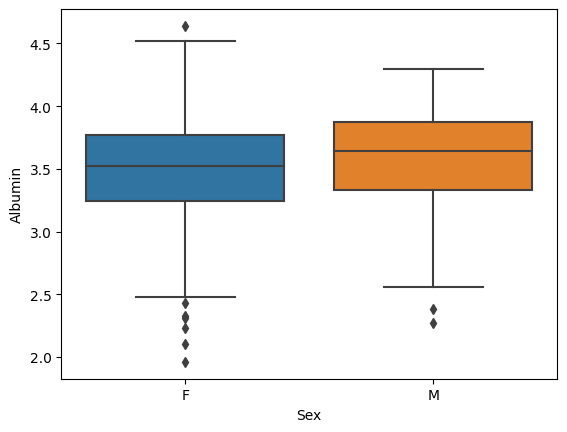

In [31]:
sns.boxplot(x = df["Sex"], y = (df["Albumin"]));
plt.ylabel("Albumin")
plt.xlabel("Sex")

Text(0.5, 0, 'Sex')

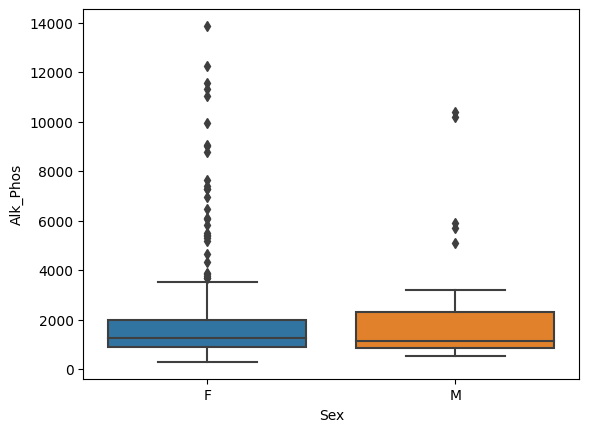

In [32]:
sns.boxplot(x = df["Sex"], y = (df["Alk_Phos"]));
plt.ylabel("Alk_Phos")
plt.xlabel("Sex")

Text(0.5, 0, 'Sex')

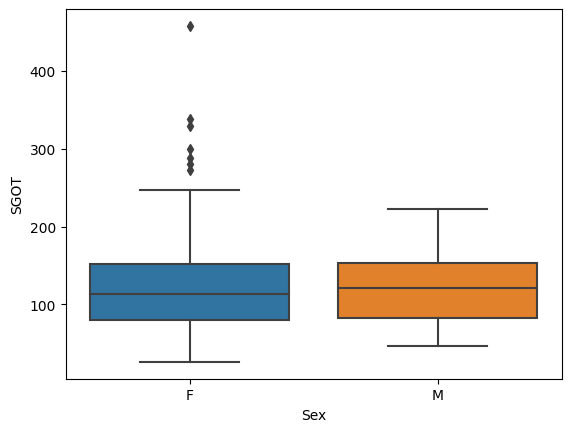

In [33]:
sns.boxplot(x = df["Sex"], y = (df["SGOT"]));
plt.ylabel("SGOT")
plt.xlabel("Sex")

Text(0.5, 0, 'Sex')

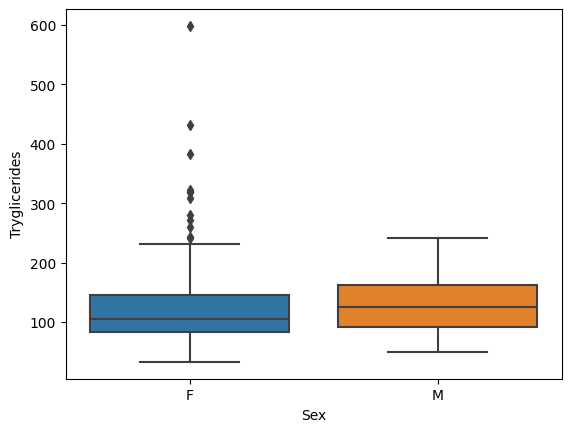

In [34]:
sns.boxplot(x = df["Sex"], y = (df["Tryglicerides"]));
plt.ylabel("Tryglicerides")
plt.xlabel("Sex")

Text(0.5, 0, 'Sex')

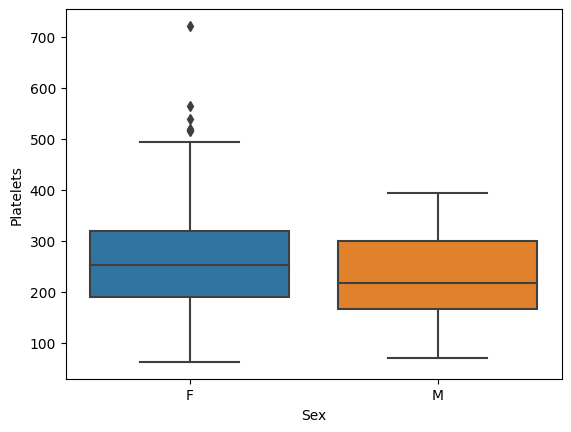

In [35]:
sns.boxplot(x = df["Sex"], y = (df["Platelets"]));
plt.ylabel("Platelets")
plt.xlabel("Sex")

Text(0.5, 0, 'Sex')

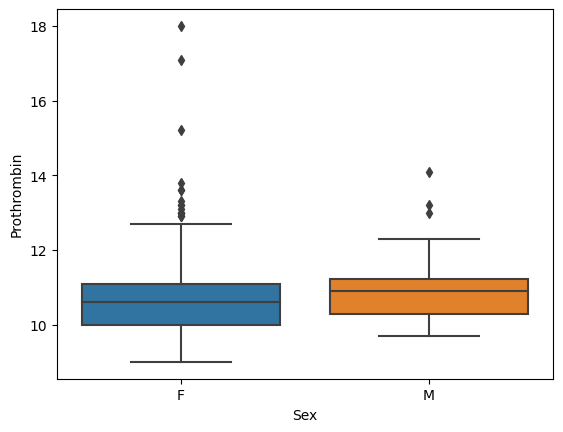

In [36]:
sns.boxplot(x = df["Sex"], y = (df["Prothrombin"]));
plt.ylabel("Prothrombin")
plt.xlabel("Sex")

Text(0.5, 0, 'Sex')

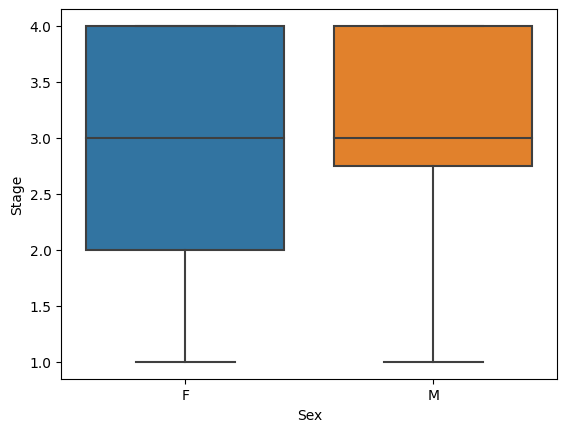

In [37]:
sns.boxplot(x = df["Sex"], y = (df["Stage"]));
plt.ylabel("Stage")
plt.xlabel("Sex")

In [38]:
# df = df[df['owner']!=5]
# df.shape

#### Distribution plot

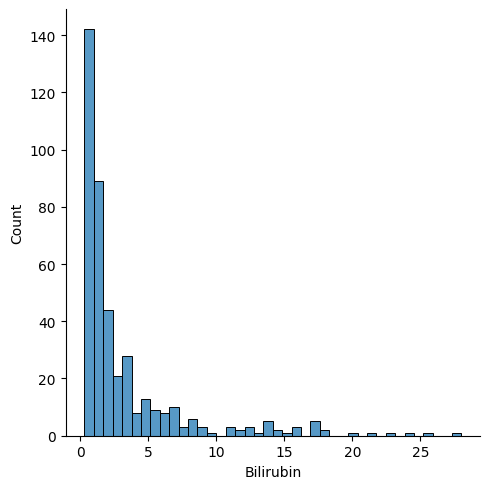

In [39]:
sns.displot(data = df, x = 'Bilirubin')

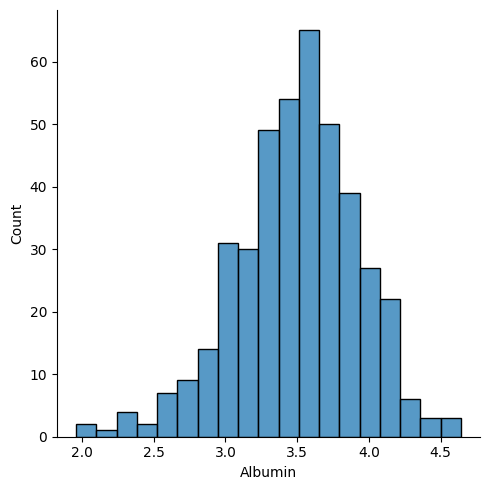

In [40]:
sns.displot(data = df, x = 'Albumin')

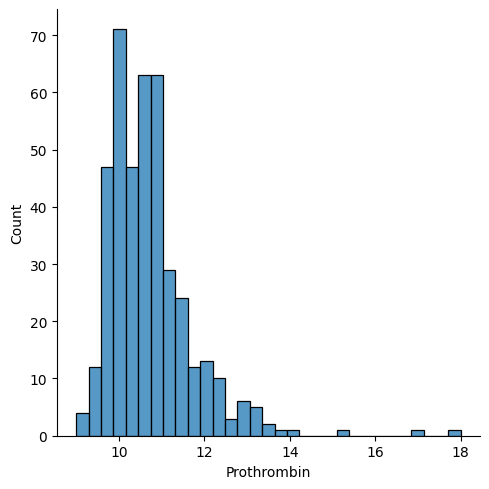

In [41]:
sns.displot(data = df, x = 'Prothrombin')

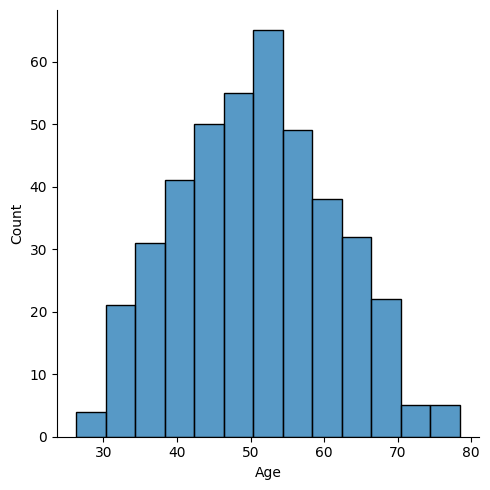

In [42]:
sns.displot(data = df, x = 'Age')

#### Scatterplot

In [43]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58.765229,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.446270,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.072553,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54.740589,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38.105407,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,67.000684,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,39.000684,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,56.999316,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,58.001369,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


<Axes: xlabel='Age', ylabel='Bilirubin'>

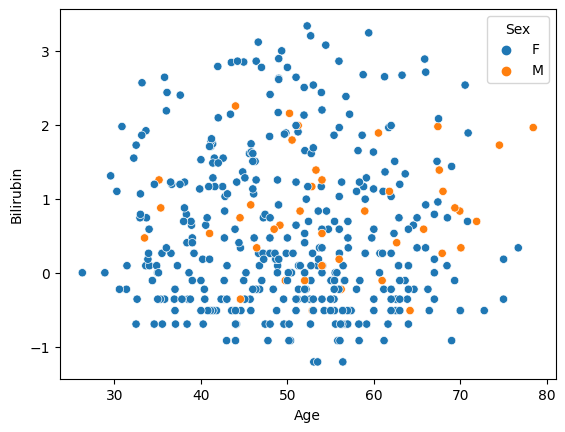

In [44]:
sns.scatterplot(x = df['Age'], y = np.log(df['Bilirubin']), hue=df['Sex'])

<Axes: xlabel='Age', ylabel='Cholesterol'>

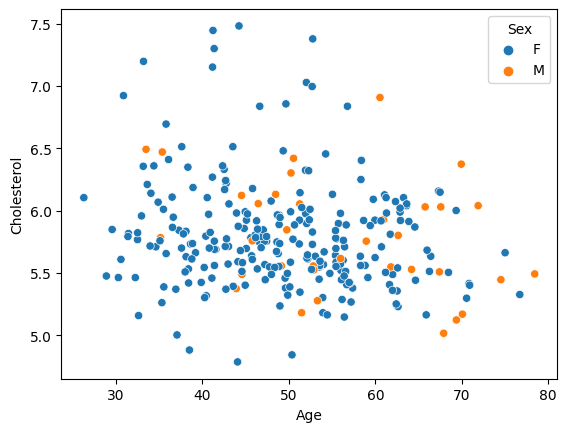

In [45]:
sns.scatterplot(x = df['Age'], y = np.log(df['Cholesterol']), hue=df['Sex'])

<Axes: xlabel='Age', ylabel='Albumin'>

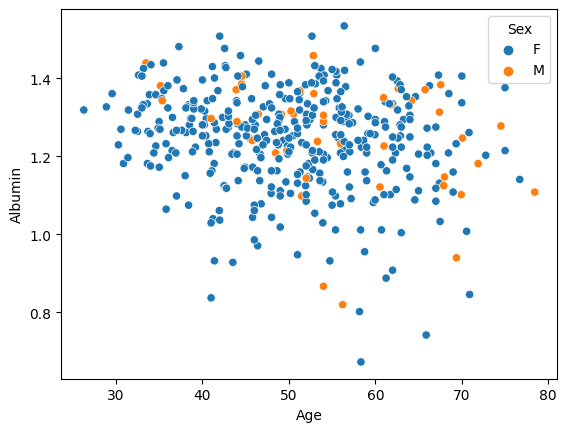

In [46]:
sns.scatterplot(x = df['Age'], y = np.log(df['Albumin']), hue=df['Sex'])

<Axes: xlabel='Age', ylabel='Copper'>

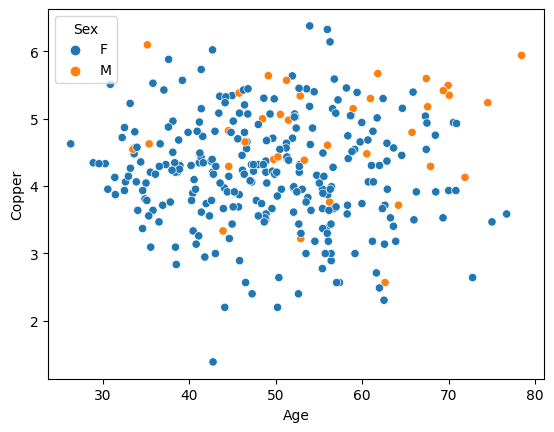

In [47]:
sns.scatterplot(x = df['Age'], y = np.log(df['Copper']), hue=df['Sex'])

<Axes: xlabel='Age', ylabel='Alk_Phos'>

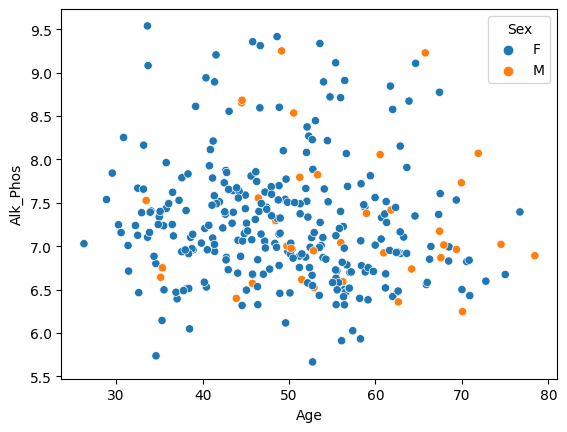

In [48]:
sns.scatterplot(x = df['Age'], y = np.log(df['Alk_Phos']), hue=df['Sex'])

<Axes: xlabel='Age', ylabel='SGOT'>

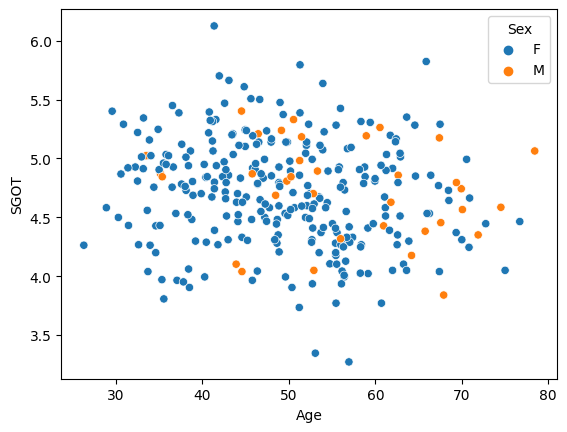

In [49]:
sns.scatterplot(x = df['Age'], y = np.log(df['SGOT']), hue=df['Sex'])

<Axes: xlabel='Age', ylabel='Tryglicerides'>

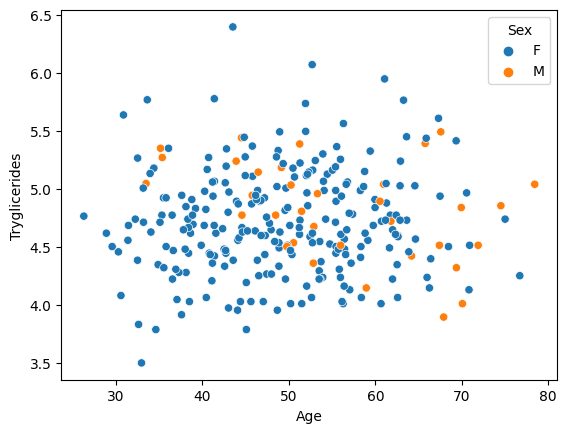

In [50]:
sns.scatterplot(x = df['Age'], y = np.log(df['Tryglicerides']), hue=df['Sex'])

<Axes: xlabel='Age', ylabel='Platelets'>

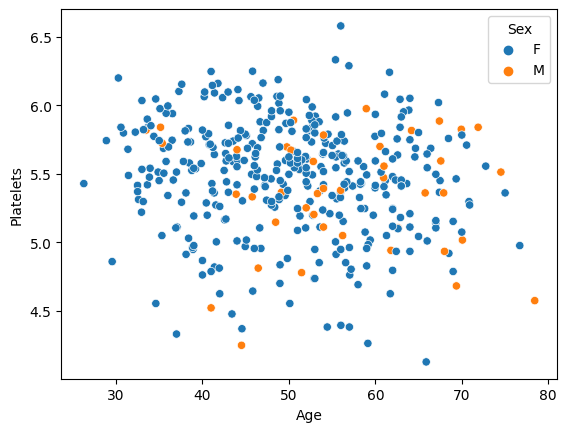

In [51]:
sns.scatterplot(x = df['Age'], y = np.log(df['Platelets']), hue=df['Sex'])

<Axes: xlabel='Age', ylabel='Prothrombin'>

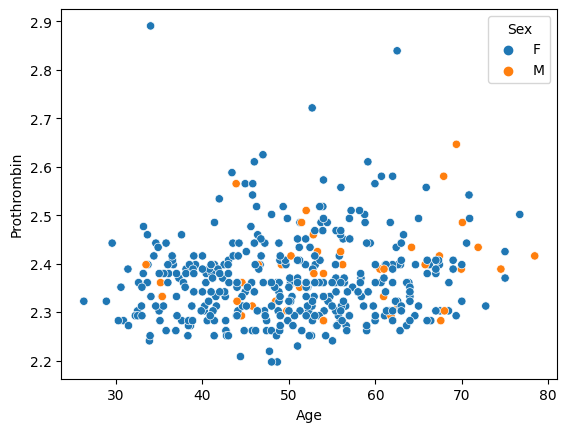

In [52]:
sns.scatterplot(x = df['Age'], y = np.log(df['Prothrombin']), hue=df['Sex'])

In [53]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58.765229,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.446270,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.072553,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54.740589,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38.105407,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,67.000684,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,39.000684,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,56.999316,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,58.001369,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [54]:
# Check for null values in each column
null_values = df.isnull().sum()

# Print the null values for each column
print("Null values in each column:")
print(null_values)

Null values in each column:
ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


#### Correlation Matrix

We use correlation matrix to find the strong factors to predict the car prices.  We will also check whether certain features are too correlated.

In [55]:
# from sklearn.impute import SimpleImputer

# # Assuming 'your_dataframe' is your DataFrame with missing values

# # Create a SimpleImputer instance with strategy='mean' for numerical columns
# numerical_imputer = SimpleImputer(strategy='mean')

# # List of columns with numerical data that you want to impute
# numerical_columns = ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# # Fit and transform the numerical imputer on the selected columns
# df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# # Assuming 'categorical_columns' is a list of columns with categorical data
# categorical_imputer = SimpleImputer(strategy='most_frequent')

# # Fit and transform the categorical imputer on the selected columns
# # df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# # Print the DataFrame to check the changes
# print(df.head())


In [56]:
from sklearn.impute import SimpleImputer

# Assuming 'your_dataframe' is your DataFrame

# List of columns with numerical data
numerical_columns = ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# Impute missing values with mean
mean_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = mean_imputer.fit_transform(df[numerical_columns])

# Impute missing values with median
median_imputer = SimpleImputer(strategy='median')
df[numerical_columns] = median_imputer.fit_transform(df[numerical_columns])

# Impute missing values with a constant (you can adjust the fill_value as needed)
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)
df[numerical_columns] = constant_imputer.fit_transform(df[numerical_columns])

# Print the DataFrame to check the changes
print(df.head())

   ID  N_Days Status             Drug        Age Sex Ascites Hepatomegaly  \
0   1     400      D  D-penicillamine  58.765229   F       Y            Y   
1   2    4500      C  D-penicillamine  56.446270   F       N            Y   
2   3    1012      D  D-penicillamine  70.072553   M       N            N   
3   4    1925      D  D-penicillamine  54.740589   F       N            Y   
4   5    1504     CL          Placebo  38.105407   F       N            Y   

  Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0       Y     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1       Y     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2       N     S        1.4        176.0     3.48   210.0     516.0   96.10   
3       Y     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4       Y     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0  

In [57]:
null_values = df.isnull().sum()
null_values

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol        0
Albumin            0
Copper             0
Alk_Phos           0
SGOT               0
Tryglicerides      0
Platelets          0
Prothrombin        0
Stage              0
dtype: int64

In [58]:
from sklearn.impute import SimpleImputer

# Assuming 'your_dataframe' is your DataFrame

# List of columns with categorical data
categorical_columns = ['Ascites', 'Hepatomegaly', 'Spiders']

# Create a SimpleImputer instance with strategy='most_frequent'
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the categorical imputer on the selected columns
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Print the DataFrame to check the changes
print(df.head())

   ID  N_Days Status             Drug        Age Sex Ascites Hepatomegaly  \
0   1     400      D  D-penicillamine  58.765229   F       Y            Y   
1   2    4500      C  D-penicillamine  56.446270   F       N            Y   
2   3    1012      D  D-penicillamine  70.072553   M       N            N   
3   4    1925      D  D-penicillamine  54.740589   F       N            Y   
4   5    1504     CL          Placebo  38.105407   F       N            Y   

  Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0       Y     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1       Y     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2       N     S        1.4        176.0     3.48   210.0     516.0   96.10   
3       Y     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4       Y     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0  

In [59]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58.765229,F,Y,Y,Y,Y,14.5,261.000000,2.60,156.000000,1718.000000,137.950000,172.000000,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.446270,F,N,Y,Y,N,1.1,302.000000,4.14,54.000000,7394.800000,113.520000,88.000000,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.072553,M,N,N,N,S,1.4,176.000000,3.48,210.000000,516.000000,96.100000,55.000000,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54.740589,F,N,Y,Y,S,1.8,244.000000,2.54,64.000000,6121.800000,60.630000,92.000000,183.0,10.3,4.0
4,5,1504,CL,Placebo,38.105407,F,N,Y,Y,N,3.4,279.000000,3.53,143.000000,671.000000,113.150000,72.000000,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,67.000684,F,N,Y,N,N,1.2,369.510563,2.96,97.648387,1982.655769,122.556346,124.702128,174.0,10.9,3.0
414,415,1103,C,NaN,39.000684,F,N,Y,N,N,0.9,369.510563,3.83,97.648387,1982.655769,122.556346,124.702128,180.0,11.2,4.0
415,416,1055,C,NaN,56.999316,F,N,Y,N,N,1.6,369.510563,3.42,97.648387,1982.655769,122.556346,124.702128,143.0,9.9,3.0
416,417,691,C,NaN,58.001369,F,N,Y,N,N,0.8,369.510563,3.75,97.648387,1982.655769,122.556346,124.702128,269.0,10.4,3.0


In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
le.classes_

array(['F', 'M'], dtype=object)

In [61]:
df.Sex.unique()

array([0, 1])

In [62]:
df["Ascites"] = le.fit_transform(df["Ascites"])
le.classes_

array(['N', 'Y'], dtype=object)

In [63]:
df.Ascites.unique()

array([1, 0])

In [64]:
df.Ascites

0      1
1      0
2      0
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: Ascites, Length: 418, dtype: int64

In [65]:
# df = df[df['Ascites']!=2]
# df.shape

In [66]:
df["Hepatomegaly"] = le.fit_transform(df["Hepatomegaly"])
le.classes_

array(['N', 'Y'], dtype=object)

In [67]:
df.Hepatomegaly.unique()

array([1, 0])

In [68]:
df.Hepatomegaly

0      1
1      1
2      0
3      1
4      1
      ..
413    1
414    1
415    1
416    1
417    1
Name: Hepatomegaly, Length: 418, dtype: int64

In [69]:
df["Spiders"] = le.fit_transform(df["Spiders"])
le.classes_

array(['N', 'Y'], dtype=object)

In [70]:
df.Spiders.unique()

array([1, 0])

In [71]:
df.Spiders

0      1
1      1
2      0
3      1
4      1
      ..
413    0
414    0
415    0
416    0
417    0
Name: Spiders, Length: 418, dtype: int64

In [72]:
df["Edema"] = le.fit_transform(df["Edema"])
le.classes_

array(['N', 'S', 'Y'], dtype=object)

In [73]:
df.Edema.unique()

array([2, 0, 1])

In [74]:
# le.transform(["Dealer", "Individual", "Trustmark Dealer"])

In [75]:
# le.transform(["Automatic", "Manual"])

In [76]:
# before using pps, let's drop country and year
dfcopy = df.copy()
dfcopy.drop(['Status'], axis=1, inplace=True)
dfcopy.drop(['N_Days'], axis=1, inplace=True)
dfcopy.drop(['ID'], axis=1, inplace=True)
dfcopy.drop(['Drug'], axis=1, inplace=True)

<Axes: >

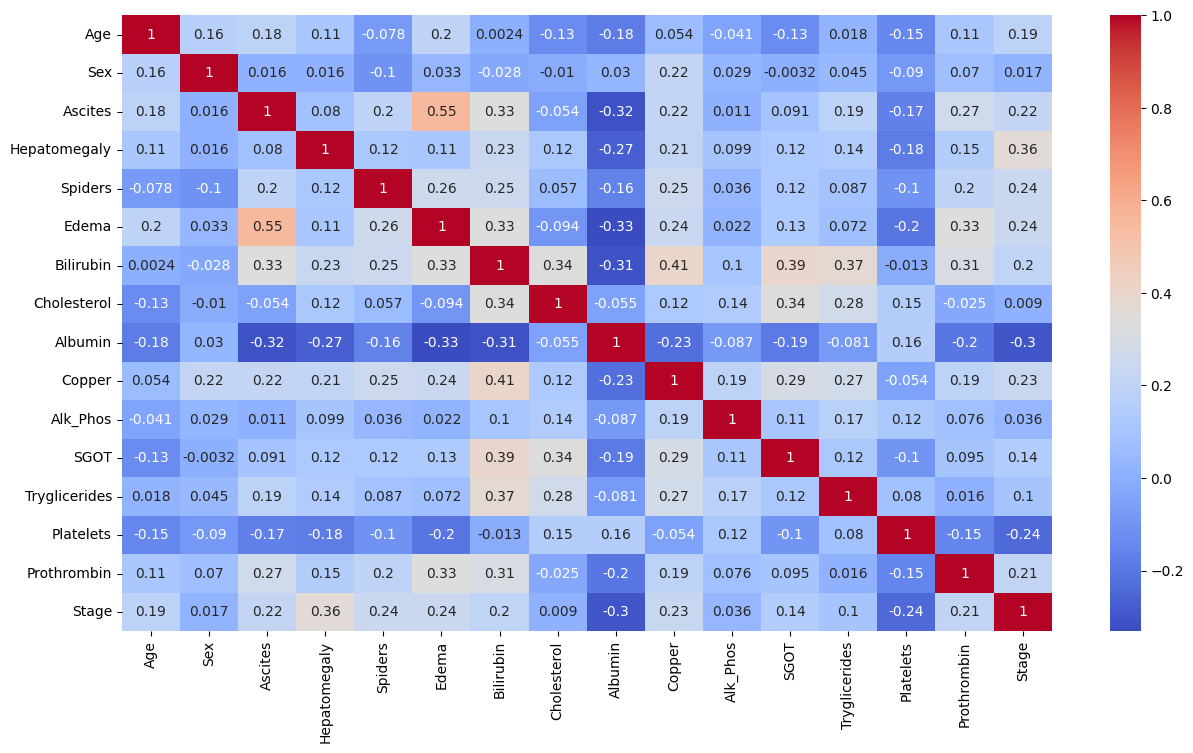

In [77]:
# df1 = df.drop("brand",axis = 1)
# plt.figure(figsize = (15,8))
# sns.heatmap(df1.corr(), annot=True, cmap="coolwarm")

plt.figure(figsize = (15,8))
sns.heatmap(dfcopy.corr(), annot=True, cmap="coolwarm")

From the correlation matrix, notice that year, engine, and max_power are some of the best features we can choose to predict car price.

<Axes: xlabel='x', ylabel='y'>

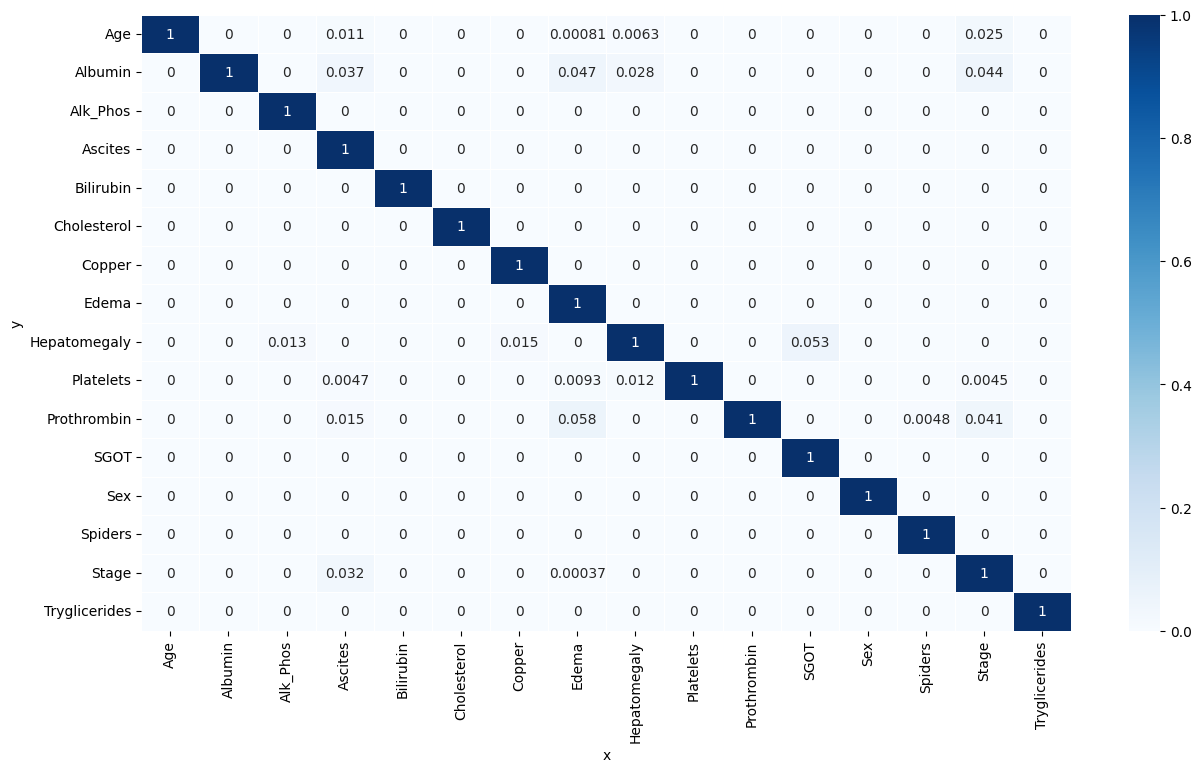

In [78]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()
dfcopy.drop(['Status'], axis=1, inplace=True)
dfcopy.drop(['N_Days'], axis=1, inplace=True)
dfcopy.drop(['ID'], axis=1, inplace=True)
dfcopy.drop(['Drug'], axis=1, inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

### Getting X and y in the right shape

In [79]:
X = df
X.shape #number of samples, number of features

m = X.shape[0]  #number of samples
n = X.shape[1]  #number of features

print(m, n)

418 20


In [80]:
y = np.log(df['Stage']) #target variable

In [81]:
y.shape #number of samples

(418,)

In [82]:
y

0      1.386294
1      1.098612
2      1.386294
3      1.386294
4      1.098612
         ...   
413    1.098612
414    1.386294
415    1.098612
416    1.098612
417    1.386294
Name: Stage, Length: 418, dtype: float64

In [83]:
# number of rows in X is the same as number of rows in y
# because so we have yhat for all y
assert m == y.shape[0] 

## 3. Feature selection

In [84]:
#X is our strong features
X = df[['Prothrombin','Albumin','Platelets','Age']]

#y is predictant
y = np.log(df["Stage"])

### Train test split

In [85]:
from sklearn.model_selection import train_test_split #to split the dataset for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) #random state is a seed value

In [86]:
assert len(X_train)  == len(y_train)
assert len(X_test)   == len(y_test)

## 4. Preprocessing

### Null values

In [110]:
X_train[['Prothrombin','Albumin','Platelets','Age']].isna().sum() #check for missing values

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/p9/y3c5p9bs7410zj5gchy5hn5c0000gn/T/ipykernel_5903/831753871.py", line 1, in <module>
    X_train[['Prothrombin','Albumin','Platelets','Age']].isna().sum() #check for missing values
IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/ultratb.py", line 1428, in structured_traceback
    return FormattedTB.s

In [111]:
X_test[['Prothrombin','Albumin','Platelets','Age']].isna().sum() #check for missing values

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/p9/y3c5p9bs7410zj5gchy5hn5c0000gn/T/ipykernel_5903/3101577826.py", line 1, in <module>
    X_test[['Prothrombin','Albumin','Platelets','Age']].isna().sum() #check for missing values
IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/ultratb.py", line 1428, in structured_traceback
    return FormattedTB.s

In [112]:
y_train.isna().sum() #check for missing values

0

In [113]:
y_test.isna().sum() #check for missing values

0

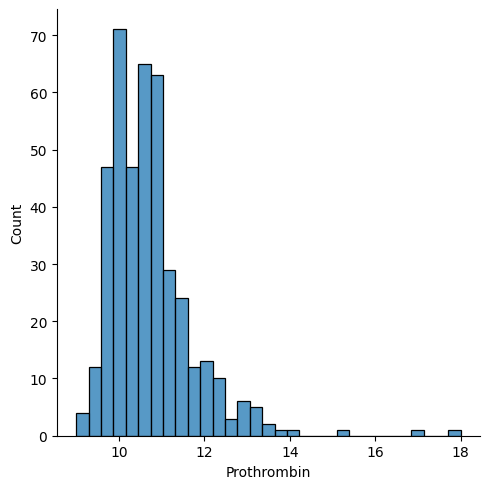

In [114]:
sns.displot(data=df, x='Prothrombin') #check for outliers

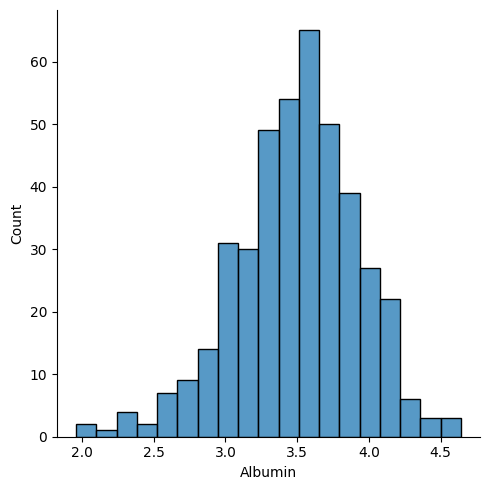

In [115]:
sns.displot(data=df, x='Albumin') #check for outliers

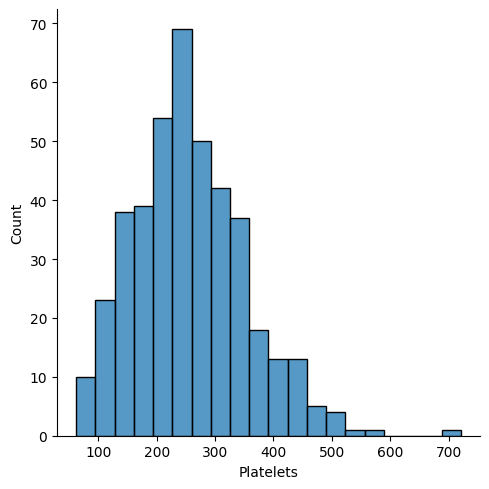

In [116]:
sns.displot(data=df, x='Platelets') #check for outliers

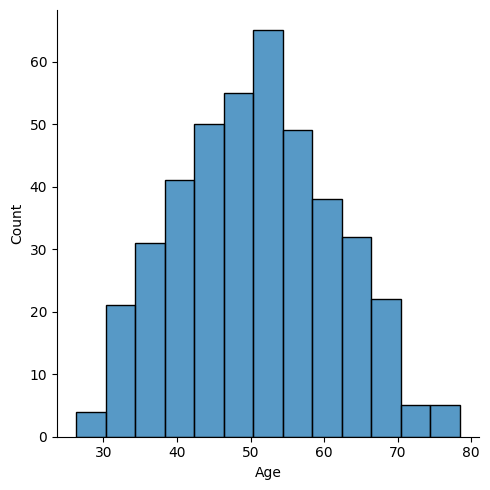

In [117]:
sns.displot(data=df, x='Age') #check for outliers

From the above three graphs, we notice that the columns engine, mileage, and max_power have null values.

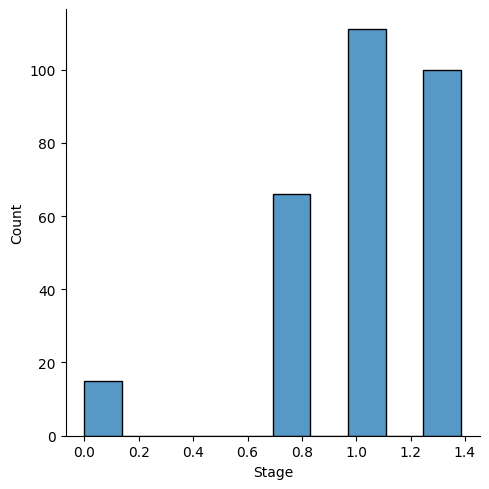

In [118]:
sns.displot(y_train) # y_train is log of selling price

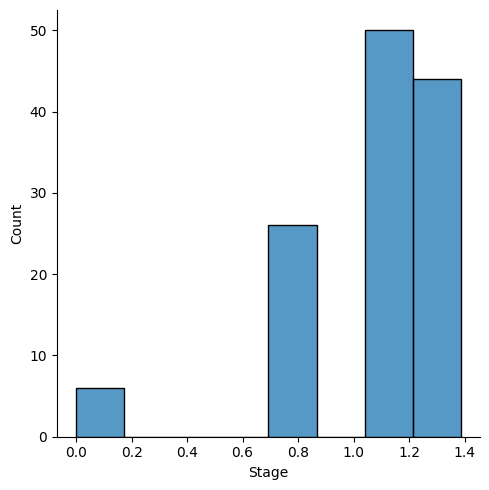

In [119]:
sns.displot(y_test) # y_test is log of selling price

However, the above two graphs for y_train and y_test do not seem to have any null values.
Therefore, we do not need to impute any data.

In [120]:
#fill the training set first!
X_train['Prothrombin'].fillna(X_train['Prothrombin'].median(), inplace=True)
X_train['Albumin'].fillna(X_train['Albumin'].median(), inplace=True)
X_train['Platelets'].fillna(X_train['Platelets'].median(), inplace=True)
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/p9/y3c5p9bs7410zj5gchy5hn5c0000gn/T/ipykernel_5903/2856429039.py", line 2, in <module>
    X_train['Prothrombin'].fillna(X_train['Prothrombin'].median(), inplace=True)
IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_trac

In [121]:
#fill the testing set with the training distribution first!
X_test['Prothrombin'].fillna(X_train['Prothrombin'].median(), inplace=True)
X_test['Albumin'].fillna(X_train['Albumin'].median(), inplace=True)
X_test['Platelets'].fillna(X_train['Platelets'].median(), inplace=True)
X_test['Age'].fillna(X_train['Age'].median(), inplace=True)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/p9/y3c5p9bs7410zj5gchy5hn5c0000gn/T/ipykernel_5903/4071584152.py", line 2, in <module>
    X_test['Prothrombin'].fillna(X_train['Prothrombin'].median(), inplace=True)
IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_trace

In [122]:
#checking for null values again
X_train[['Prothrombin','Albumin','Platelets','Age']].isna().sum()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/p9/y3c5p9bs7410zj5gchy5hn5c0000gn/T/ipykernel_5903/111763866.py", line 2, in <module>
    X_train[['Prothrombin','Albumin','Platelets','Age']].isna().sum()
IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_traceback(
  Fil

In [123]:
X_test[['Prothrombin','Albumin','Platelets','Age']].isna().sum() #checking for null values again

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/p9/y3c5p9bs7410zj5gchy5hn5c0000gn/T/ipykernel_5903/632628642.py", line 1, in <module>
    X_test[['Prothrombin','Albumin','Platelets','Age']].isna().sum() #checking for null values again
IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/ultratb.py", line 1428, in structured_traceback
    return Formatte

In [124]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape #checking the shapes

((292, 5), (126, 5), (292,), (126,))

### Checking Outliers

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/p9/y3c5p9bs7410zj5gchy5hn5c0000gn/T/ipykernel_5903/3087192141.py", line 9, in <module>
    plt.boxplot(X_train[variable])
IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/richakakati/Library/Pyth

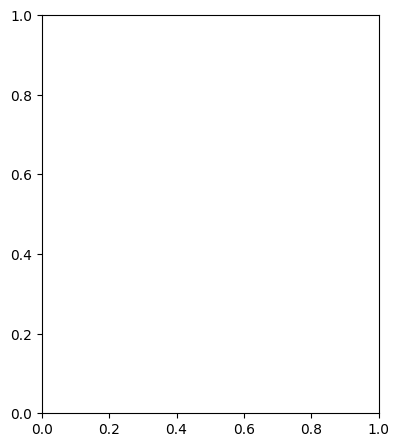

In [125]:
# Create a dictionary of columns.
col_dict = {'Prothrombin':1,'Albumin':2,'Platelets':3, 'Age':4}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [126]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [127]:
for col in X_train.columns:
    outlier_count(col)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/p9/y3c5p9bs7410zj5gchy5hn5c0000gn/T/ipykernel_5903/1051026808.py", line 1, in <module>
    for col in X_train.columns:
AttributeError: 'numpy.ndarray' object has no attribute 'columns'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/ultratb.py", line 131

In [128]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False) 
y_test.to_csv('y_test.csv', index=False)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/p9/y3c5p9bs7410zj5gchy5hn5c0000gn/T/ipykernel_5903/1705870229.py", line 1, in <module>
    X_train.to_csv('X_train.csv', index=False)
AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/ultratb

### Scaling

In [129]:
X_train.head(), y_train.head()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/p9/y3c5p9bs7410zj5gchy5hn5c0000gn/T/ipykernel_5903/989208830.py", line 1, in <module>
    X_train.head(), y_train.head()
AttributeError: 'numpy.ndarray' object has no attribute 'head'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/richakakati/Library/Python/3.10/lib/python/site-packages/IPython/core/ultratb.py", line 1319

In [130]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

###  Adding intercepts

In [131]:
# np.ones((shape))
intercept = np.ones((X_train.shape[0], 1))

# concatenate the intercept based on axis=1
X_train = np.concatenate((intercept, X_train), axis=1)

# np.ones((shape))
intercept = np.ones((X_test.shape[0], 1))

# concatenate the intercept based on axis=1
X_test = np.concatenate((intercept, X_test), axis=1)

In [132]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (292, 6)
Shape of X_test:  (126, 6)
Shape of y_train:  (292,)
Shape of y_test:  (126,)


# Modeling Team
## 5. Modeling